# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#2 Bayes' classifier,k-means and k-NN</center>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

In [4]:
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])
print('Feature|Classe')
print(dataset)

Feature|Classe
[[3.39 0.  ]
 [3.58 0.  ]
 [2.28 0.  ]
 [7.42 1.  ]
 [5.74 1.  ]
 [9.17 1.  ]
 [7.79 1.  ]
 [7.93 1.  ]
 [1.34 0.  ]
 [3.11 0.  ]]


### Find class probability $P_1$ and $P_2$

In [5]:
#write code here
total_samples = len(dataset)
Count_Zero = 0
Count_One = 0

for i in range(total_samples):
    if dataset[i,1] == 0:
        Count_Zero +=1 
    else:
        Count_One +=1
print("probability  𝑃1",Count_One/total_samples)
print("probability  𝑃2",Count_Zero/total_samples)

probability  𝑃1 0.5
probability  𝑃2 0.5


### Find sample mean and sample standard deviation for each class 

In [6]:
#write code here
import math


def Avg_for_array(x):
    sum = 0
    length = len(x)
    for i in x:
        sum = sum + i
    print("Total Sum :",sum,"     Mean of the Class:",(sum/length))
    return (sum/length)

def Standard_dev_array(x):
    mean = Avg_for_array(class0)
    temp = []
    for each in x:
        each -= mean
        temp.append(each**2)
    intermidiate = Avg_for_array(temp)
    standard_dev = math.sqrt(intermidiate)
    print("Standard Deviation for Class:",standard_dev)
    return standard_dev
        
    

class0 = []
class1 = []
length = len(dataset)

for i in range(length):
    if dataset[i,1] == 0:
        class0.append(dataset[i:,0][0])
    else:
        class1.append(dataset[i:,0][0])

        
# Avg_for_array(class0)
# Avg_for_array(class1)
print("Mean of class 0 is ",np.average(class0))
print("Mean of class 1 is ",np.average(class1))
# Standard_dev_array(class0)
# Standard_dev_array(class1)
# print(class0)
        
print("Standard Deviation for Class 0 is : ",np.std(class0))
print("Standard Deviation for Class 1 is :",np.std(class1))








Mean of class 0 is  2.7399999999999998
Mean of class 1 is  7.609999999999999
Standard Deviation for Class 0 is :  0.8290476463991681
Standard Deviation for Class 1 is : 1.1046628444914763


### Plot $p_1(x)$ and $p_2(x)$

In [1]:
# Calculate the Gaussian probability distribution function for x
import math
def calculate_probability(x, mean, stdev):
    #write code here
    denom = stdev*(math.sqrt(2*math.pi))
    p = np.array(())
    for i in x:
        exponent = (-0.5)*(((float(i) - float(mean))/stdev)**2.0)
        e = math.exp(exponent)
        value = e/denom
        p = np.append(p,value)
    return p

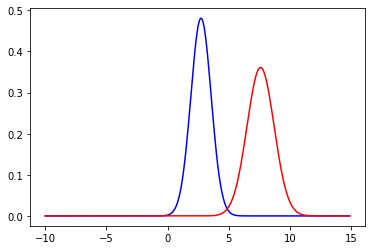

In [8]:
x  = np.arange(-10,15,0.1)
plt.plot(x,calculate_probability(x,np.average(class0),np.std(class0)),'b',x,calculate_probability(x,np.average(class1),np.std(class1)),'r')

### Test for $x=3$  and $x=5$

In [19]:
#for x=3
#write code here
def predict(x):
    distance_to_0 = ((x-np.average(class0))/np.std(class0))**2
    distance_to_1 = ((x-np.average(class1))/np.std(class1))**2
    if distance_to_0 < distance_to_1:
        print("class 0")
    else:
        print("class 1")
    return 
predict(3)



class 0


In [20]:
#for x=5
#write code here
predict(5)

class 1


## Homework:
1. Try for this 2-D data using classnote
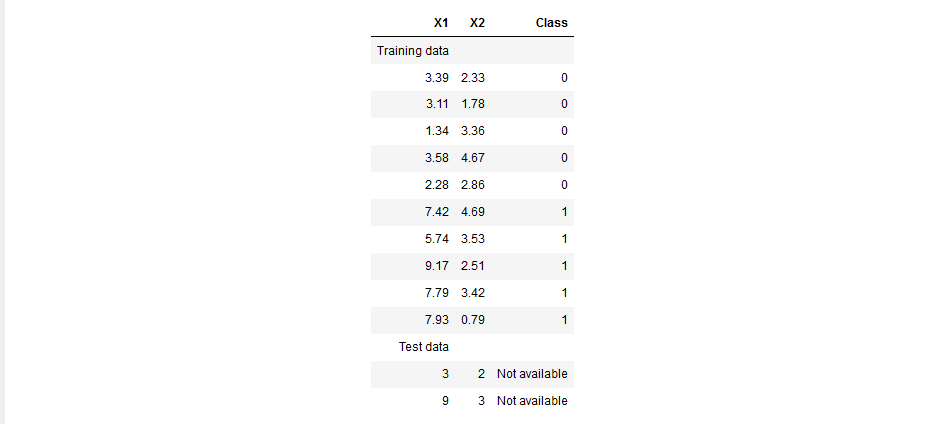
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

Q1. 2D dataset

In [ ]:
#write code here
import pandas as pd
import numpy as np
import math
data2D = {'x1':[3.39,3.11,1.34,3.58,2.28,7.42,5.74,9.17,7.79,7.93],
          'x2':[2.33,1.78,3.36,4.67,2.86,4.69,3.53,2.51,3.42,0.79],
          'class':[0,0,0,0,0,1,1,1,1,1]}
dataset = pd.DataFrame(data2D,columns = ['x1','x2','class'])
#function to find the mean
def Mean_array(x):
    total = len(x)
    sum = 0
    for i in x:
        sum = sum + i
    return (sum/total)

#function to find the standard Deviation
def Std_array(x):
    total = len(x)
    mean = Mean_array(x)
    sum = 0
    for i in x:
        sum = sum + (i-mean)**2
    final = math.sqrt(sum/total)
    return final


#function for Variance
def Var_array(x):
    total = len(x)
    mean = Mean_array(x)
    sum = 0
    for i in x:
        sum = sum + (i-mean)**2
    final = (sum/total)
    return final

#function for finding the co-variance for array type
def Co_var_array(x,y):
    x1 = Mean_array(x)
    y1 = Mean_array(y)
    sum = 0
    for i in range(len(x)):
        sum = sum +(((x[i]-x1)*(y[i]-y1))/(len(x)-1))    
    return sum

#function for calculating the distance

def predict_class(x,m0,m1):
    inverse_m0 = np.linalg.inv(m0)
    inverse_m1 = np.linalg.inv(m1)
    
    v1 = np.array(())
    v2 = np.array(())
    for i in range(len(x)):
        y1 = x[i]-Mean_class0[i]
        y2 = x[i]-Mean_class1[i]
        v1 = np.append(v1,y1)
        v2 = np.append(v2,y2)

    v1t=v1.transpose()
    v2t=v2.transpose()

    r1=np.dot(v1t,m0)
    r01=np.dot(r1,v1)
    
    r2=np.dot(v2t,m1)
    r02=np.dot(r2,v2)
    
    if r01<=r02:
        print("Class 0")
    else:
        print("Class 1")

#"Calculate the class probability P1 and P2"

total_sample = len(dataset)
total_class0 = 0
total_class1 = 0
for i in range(total_sample):
    if dataset['class'][i] == 0:
        total_class0 += 1
    else:
        total_class1 += 1
        

print("Probability of class 0  is :",(total_class0/total_sample))
print("Probability of class 0  is :",(total_class1/total_sample))



#calculate the mean of the feature
featureX1_class0 = []
featureX2_class0 = []
featureX1_class1 = []
featureX2_class1 = []

for i in range(total_sample):
    if dataset['class'][i] == 0:
        featureX1_class0.append(dataset['x1'][i])
        featureX2_class0.append(dataset['x2'][i])
    else:
        featureX1_class1.append(dataset['x1'][i])
        featureX2_class1.append(dataset['x2'][i])

MeanX1_class0 = Mean_array(featureX1_class0)
MeanX2_class0 = Mean_array(featureX2_class0)
MeanX1_class1 = Mean_array(featureX1_class1)
MeanX2_class1 = Mean_array(featureX2_class1)

Mean_class0 = np.array([MeanX1_class0,MeanX2_class0])
Mean_class1 = np.array([MeanX1_class1,MeanX2_class1])

print("Mean Vector for class 0",Mean_class0)
print("Mean Vector for class 1",Mean_class1)


# std vector for classes
Std_class0 = np.array([Std_array(featureX1_class0),Std_array(featureX2_class0)])
Std_class1 = np.array([Std_array(featureX1_class1),Std_array(featureX2_class1)])

print("Standard Deviation Vector for class 0 ",Std_class0)
print("Standard Deviation Vector for class 1 ",Std_class1)



#variance - Covariance matrix

var_Co_var_matrix_class0 = np.array([[Co_var_array(featureX1_class0,featureX1_class0),Co_var_array(featureX1_class0,featureX2_class0)],
                            [Co_var_array(featureX2_class0,featureX1_class0),Co_var_array(featureX2_class0,featureX2_class0)]])   
var_Co_var_matrix_class1 = np.array([[Co_var_array(featureX1_class1,featureX1_class1),Co_var_array(featureX1_class1,featureX2_class1)],
                            [Co_var_array(featureX2_class1,featureX1_class1),Co_var_array(featureX2_class1,featureX2_class1)]])   


print("Variance covariance Matrix for class 0 \n",var_Co_var_matrix_class0)
print("Variance covariance Matrix for class 1\n ",var_Co_var_matrix_class1)


h=int(input("How many test data you have?\n"))
for i in range(h):
    x=np.array(())
    d1, d2 = [int(x) for x in input("Enter x1 and x2: \n").split()]
    x =np.append(x,[d1,d2])
    print("X1 ",x[0],"X2 ",x[1])
    predict_class(x,var_Co_var_matrix_class0,var_Co_var_matrix_class1)



Probability of class 0  is : 0.5
Probability of class 0  is : 0.5
Mean Vector for class 0 [2.74 3.  ]
Mean Vector for class 1 [7.61  2.988]
Standard Deviation Vector for class 0  [0.82904765 0.98746139]
Standard Deviation Vector for class 1  [1.10466284 1.29899038]
Variance covariance Matrix for class 0 
 [[0.85915  0.019075]
 [0.019075 1.21885 ]]
Variance covariance Matrix for class 1
  [[ 1.52535 -0.67705]
 [-0.67705  2.10922]]


Q2.iris Dataset

we can do same as we did for 2D data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


iris_dataset = pd.read_csv("Iris.csv") 
# print(iris_dataset.head(10))

#function to find the mean
def Mean_array(x):
    total = len(x)
    sum = 0
    for i in x:
        sum = sum + i
    return (sum/total)

#function to find the standard Deviation
def Std_array(x):
    total = len(x)
    mean = Mean_array(x)
    sum = 0
    for i in x:
        sum = sum + (i-mean)**2
    final = math.sqrt(sum/total)
    return final


#function for Variance
def Var_array(x):
    total = len(x)
    mean = Mean_array(x)
    sum = 0
    for i in x:
        sum = sum + (i-mean)**2
    final = (sum/total)
    return final

#function for finding the co-variance for array type
def Co_var_array(x,y):
    x1 = Mean_array(x)
    y1 = Mean_array(y)
    sum = 0
    for i in range(len(x)):
        sum = sum +(((x[i]-x1)*(y[i]-y1))/(len(x)-1))    
    return sum

#function for calculating the distance

def predict_class(x,m0,m1,m2):
    inverse_m0 = np.linalg.inv(m0)
    inverse_m1 = np.linalg.inv(m1)
    inverse_m2 = np.linalg.inv(m2)
    
    v1 = np.array(())
    v2 = np.array(())
    v3 = np.array(())
    for i in range(len(x)):
        y1 = x[i]-Mean_Vector_class0[i]
        y2 = x[i]-Mean_Vector_class1[i]
        y3 = x[i]-Mean_Vector_class2[i]
        v1 = np.append(v1,y1)
        v2 = np.append(v2,y2)
        v3 = np.append(v3,y3)

    v1t=v1.transpose()
    v2t=v2.transpose()
    v3t=v3.transpose()

    r1=np.dot(v1t,m0)
    r01=np.dot(r1,v1)
    
    r2=np.dot(v2t,m1)
    r02=np.dot(r2,v2)
    
    r3=np.dot(v3t,m2)
    r03=np.dot(r3,v3)
    
    if (r01 < r02) and (r01 < r03) :
        print("Class 0")
    elif (r02 < r01) and (r02 < r03):
            print("Class 1")
    else:
        print("class 2")


#"Calculate the class probability P1 , P2 and P3"

# lets consider 
# 'Iris-setosa'     => class0 
# 'Iris-versicolor' => class1  
# 'Iris-virginica'  => class2


total_sample = len(iris_dataset)
# print("Total Data rows ",total_sample)
total_class0 = 0
total_class1 = 0
total_class2 = 0
for i in range(total_sample):
    if iris_dataset['Species'][i] == 'Iris-setosa':
        total_class0 += 1
    if iris_dataset['Species'][i] == 'Iris-versicolor':
        total_class1 +=1
    if iris_dataset['Species'][i] == 'Iris-virginica':
        total_class2 +=1
        
# print("Probability of class 0  is :",(total_class0/total_sample))
# print("Probability of class 1  is :",(total_class1/total_sample))
# print("Probability of class 2  is :",(total_class2/total_sample))       



#calculate the mean of the feature
SepalLengthCm_class0 = []
SepalLengthCm_class1  = []
SepalLengthCm_class2  = []

SepalWidthCm_class0 = []
SepalWidthCm_class1 = []
SepalWidthCm_class2 = []

PetalLengthCm_class0 = []
PetalLengthCm_class1 = []
PetalLengthCm_class2 = []

PetalWidthCm_class0 = []
PetalWidthCm_class1 = []
PetalWidthCm_class2 = []


for i in range(total_sample):
    if iris_dataset['Species'][i] == 'Iris-setosa':
        SepalLengthCm_class0.append(iris_dataset['SepalLengthCm'][i]);
        SepalWidthCm_class0.append(iris_dataset['SepalWidthCm'][i]);
        PetalLengthCm_class0.append(iris_dataset['PetalLengthCm'][i]);
        PetalWidthCm_class0.append(iris_dataset['PetalWidthCm'][i]);
        
    if iris_dataset['Species'][i] == 'Iris-versicolor':
        SepalLengthCm_class1.append(iris_dataset['SepalLengthCm'][i]);
        SepalWidthCm_class1.append(iris_dataset['SepalWidthCm'][i]);
        PetalLengthCm_class1.append(iris_dataset['PetalLengthCm'][i]);
        PetalWidthCm_class1.append(iris_dataset['PetalWidthCm'][i]);
        
    if iris_dataset['Species'][i] == 'Iris-virginica':
        SepalLengthCm_class2.append(iris_dataset['SepalLengthCm'][i]);
        SepalWidthCm_class2.append(iris_dataset['SepalWidthCm'][i]);
        PetalLengthCm_class2.append(iris_dataset['PetalLengthCm'][i]);
        PetalWidthCm_class2.append(iris_dataset['PetalWidthCm'][i]);
        
Mean_Vector_class0 = np.array([Mean_array(SepalLengthCm_class0),Mean_array(SepalWidthCm_class0),Mean_array(PetalLengthCm_class0),Mean_array(PetalWidthCm_class0)])
Mean_Vector_class1 = np.array([Mean_array(SepalLengthCm_class1),Mean_array(SepalWidthCm_class1),Mean_array(PetalLengthCm_class1),Mean_array(PetalWidthCm_class1)])
Mean_Vector_class2 = np.array([Mean_array(SepalLengthCm_class2),Mean_array(SepalWidthCm_class2),Mean_array(PetalLengthCm_class2),Mean_array(PetalWidthCm_class2)])

print("Mean Vector of class 0 :",Mean_Vector_class0,"\nMean Vector of class 1 :",Mean_Vector_class1,"\nMean Vector of class 2 :",Mean_Vector_class2)


# std vector for classes
Std_Vector_class0 = np.array([Std_array(SepalLengthCm_class0),Std_array(SepalWidthCm_class0),Std_array(PetalLengthCm_class0),Std_array(PetalWidthCm_class0)])
Std_Vector_class1 = np.array([Std_array(SepalLengthCm_class1),Std_array(SepalWidthCm_class1),Std_array(PetalLengthCm_class1),Std_array(PetalWidthCm_class1)])
Std_Vector_class2 = np.array([Std_array(SepalLengthCm_class2),Std_array(SepalWidthCm_class2),Std_array(PetalLengthCm_class2),Std_array(PetalWidthCm_class2)])


print("Standard Deviation Vector for class 0 ",Std_Vector_class0)
print("Standard Deviation Vector for class 1 ",Std_Vector_class1)
print("Standard Deviation Vector for class 2 ",Std_Vector_class2)


#variance - Covariance matrix
var_Co_var_matrix_class0 = np.array([[Co_var_array(SepalLengthCm_class0,SepalLengthCm_class0),
                                      Co_var_array(SepalLengthCm_class0,SepalWidthCm_class0),
                                      Co_var_array(SepalLengthCm_class0,PetalLengthCm_class0),
                                      Co_var_array(SepalLengthCm_class0,PetalWidthCm_class0)],
                                     [Co_var_array(SepalWidthCm_class0,SepalLengthCm_class0),
                                      Co_var_array(SepalWidthCm_class0,SepalWidthCm_class0),
                                      Co_var_array(SepalWidthCm_class0,PetalLengthCm_class0),
                                      Co_var_array(SepalWidthCm_class0,PetalWidthCm_class0)],
                                     [Co_var_array(PetalLengthCm_class0,SepalLengthCm_class0),
                                      Co_var_array(PetalLengthCm_class0,SepalWidthCm_class0),
                                      Co_var_array(PetalLengthCm_class0,PetalLengthCm_class0),
                                      Co_var_array(PetalLengthCm_class0,PetalWidthCm_class0)],
                                     [Co_var_array(PetalWidthCm_class0,SepalLengthCm_class0),
                                      Co_var_array(PetalWidthCm_class0,SepalWidthCm_class0),
                                      Co_var_array(PetalWidthCm_class0,PetalLengthCm_class0),
                                      Co_var_array(PetalWidthCm_class0,PetalWidthCm_class0)]])

var_Co_var_matrix_class1 = np.array([[Co_var_array(SepalLengthCm_class1,SepalLengthCm_class1),
                                      Co_var_array(SepalLengthCm_class1,SepalWidthCm_class1),
                                      Co_var_array(SepalLengthCm_class1,PetalLengthCm_class1),
                                      Co_var_array(SepalLengthCm_class1,PetalWidthCm_class1)],
                                     [Co_var_array(SepalWidthCm_class1,SepalLengthCm_class1),
                                      Co_var_array(SepalWidthCm_class1,SepalWidthCm_class1),
                                      Co_var_array(SepalWidthCm_class1,PetalLengthCm_class1),
                                      Co_var_array(SepalWidthCm_class1,PetalWidthCm_class1)],
                                     [Co_var_array(PetalLengthCm_class1,SepalLengthCm_class1),
                                      Co_var_array(PetalLengthCm_class1,SepalWidthCm_class1),
                                      Co_var_array(PetalLengthCm_class1,PetalLengthCm_class1),
                                      Co_var_array(PetalLengthCm_class1,PetalWidthCm_class1)],
                                     [Co_var_array(PetalWidthCm_class1,SepalLengthCm_class1),
                                      Co_var_array(PetalWidthCm_class1,SepalWidthCm_class1),
                                      Co_var_array(PetalWidthCm_class1,PetalLengthCm_class1),
                                      Co_var_array(PetalWidthCm_class1,PetalWidthCm_class1)]])

var_Co_var_matrix_class2 = np.array([[Co_var_array(SepalLengthCm_class2,SepalLengthCm_class2),
                                      Co_var_array(SepalLengthCm_class2,SepalWidthCm_class2),
                                      Co_var_array(SepalLengthCm_class2,PetalLengthCm_class2),
                                      Co_var_array(SepalLengthCm_class2,PetalWidthCm_class2)],
                                     [Co_var_array(SepalWidthCm_class2,SepalLengthCm_class2),
                                      Co_var_array(SepalWidthCm_class2,SepalWidthCm_class2),
                                      Co_var_array(SepalWidthCm_class2,PetalLengthCm_class2),
                                      Co_var_array(SepalWidthCm_class2,PetalWidthCm_class2)],
                                     [Co_var_array(PetalLengthCm_class2,SepalLengthCm_class2),
                                      Co_var_array(PetalLengthCm_class2,SepalWidthCm_class2),
                                      Co_var_array(PetalLengthCm_class2,PetalLengthCm_class2),
                                      Co_var_array(PetalLengthCm_class2,PetalWidthCm_class2)],
                                     [Co_var_array(PetalWidthCm_class2,SepalLengthCm_class2),
                                      Co_var_array(PetalWidthCm_class2,SepalWidthCm_class2),
                                      Co_var_array(PetalWidthCm_class2,PetalLengthCm_class2),
                                      Co_var_array(PetalWidthCm_class2,PetalWidthCm_class2)]])

print("Variance covariance Matrix for class 0 \n",var_Co_var_matrix_class0)
print("Variance covariance Matrix for class 1 \n",var_Co_var_matrix_class1)
print("Variance covariance Matrix for class 2 \n",var_Co_var_matrix_class2)





x = [5.7, 2.9, 4.2, 1.3]  
print("For values",x,"class is :" )
predict_class(x,var_Co_var_matrix_class0,var_Co_var_matrix_class1,var_Co_var_matrix_class2)








    

Mean Vector of class 0 : [5.006 3.418 1.464 0.244] 
Mean Vector of class 1 : [5.936 2.77  4.26  1.326] 
Mean Vector of class 2 : [6.588 2.974 5.552 2.026]
Standard Deviation Vector for class 0  [0.34894699 0.37719491 0.17176728 0.10613199]
Standard Deviation Vector for class 1  [0.51098337 0.31064449 0.46518813 0.19576517]
Standard Deviation Vector for class 2  [0.62948868 0.31925538 0.54634787 0.27188968]
Variance covariance Matrix for class 0 
 [[0.12424898 0.10029796 0.01613878 0.01054694]
 [0.10029796 0.14517959 0.01168163 0.01143673]
 [0.01613878 0.01168163 0.03010612 0.00569796]
 [0.01054694 0.01143673 0.00569796 0.01149388]]
Variance covariance Matrix for class 1 
 [[0.26643265 0.08518367 0.18289796 0.05577959]
 [0.08518367 0.09846939 0.08265306 0.04120408]
 [0.18289796 0.08265306 0.22081633 0.07310204]
 [0.05577959 0.04120408 0.07310204 0.03910612]]
Variance covariance Matrix for class 2 
 [[0.40434286 0.09376327 0.3032898  0.04909388]
 [0.09376327 0.10400408 0.07137959 0.04762

## 2. K-Nearest neighbour (KNN)

Consider the following observations:
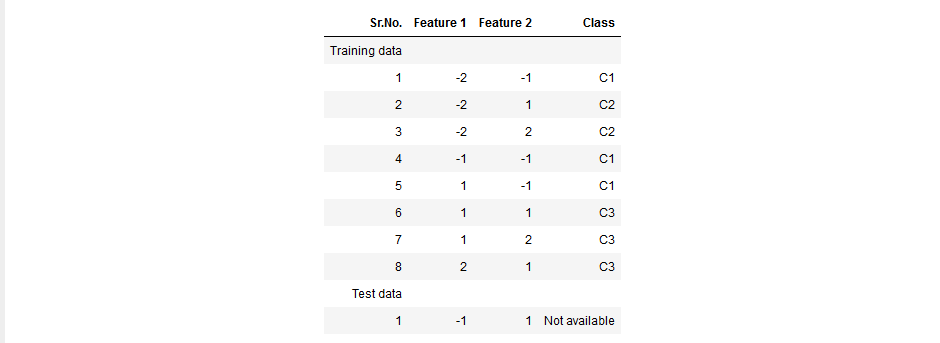

Use KNN technique to classify the test data using K=3.

Hint: 
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours. 

In [24]:
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


In [198]:
#calculate the distance
def calculate_distance(x,y):
    return math.sqrt(((x[1]-y[1])**2 + (x[0]-y[0])**2))


#function to predict the class
def predict_knn_class(new_point):
    
    output = []
    for i in range(len(data)):
        output.append([calculate_distance(new_point,data[i]),data[i][0],data[i][1],data[i][2]])
        output.sort()
        
        
    print("euclidean distance|Feature1|Feature2|Class")
    for i in range(len(output)):
        print("\n",output[i])
        
        
    class1_count = 0
    class2_count = 0
    class3_count = 0
    for i in range(3):
        if output[i][3]==1:
            class1_count +=1
        elif output[i][3]==2:
            class2_count +=1
        else:
            class3_count +=1
    if (class1_count>=class2_count) and (class1_count>=class3_count):
        print("Test data is in Class 1")
    elif (class2_count>=class3_count):
        print("Test data is in Class 2")
    else:
        print("Test data is in Class 3")

def draw_graph(new_point):    
    class1_F1 = [1,-1,-2]
    class1_F2 = [-1,-1,-1]

    class2_F1 = [-2,-2]
    class2_F2 = [1,2]

    class3_F1 = [1,1,2]
    class3_F2 = [1,2,1]

    plt.scatter(class1_F1,class1_F2,color='blue',s=150)
    plt.scatter(class2_F1,class2_F2,color='orange',s=160)
    plt.scatter(class3_F1,class3_F2,color='green',s=160)
    plt.scatter(new_point[0],new_point[1],color = 'red')

euclidean distance|Feature1|Feature2|Class

 [1.0, -2.0, 1.0, 2.0]

 [1.4142135623730951, -2.0, 2.0, 2.0]

 [2.0, -1.0, -1.0, 1.0]

 [2.0, 1.0, 1.0, 3.0]

 [2.23606797749979, -2.0, -1.0, 1.0]

 [2.23606797749979, 1.0, 2.0, 3.0]

 [2.8284271247461903, 1.0, -1.0, 1.0]

 [3.0, 2.0, 1.0, 3.0]
Test data is in Class 2


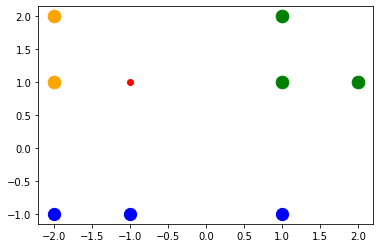

In [199]:
#enter your point here
point = [-1,1]
predict_knn_class(point)
draw_graph(point)

euclidean distance|Feature1|Feature2|Class

 [0.0, 1.0, -1.0, 1.0]

 [2.0, -1.0, -1.0, 1.0]

 [2.0, 1.0, 1.0, 3.0]

 [2.23606797749979, 2.0, 1.0, 3.0]

 [3.0, -2.0, -1.0, 1.0]

 [3.0, 1.0, 2.0, 3.0]

 [3.605551275463989, -2.0, 1.0, 2.0]

 [4.242640687119285, -2.0, 2.0, 2.0]
Test data is in Class 1


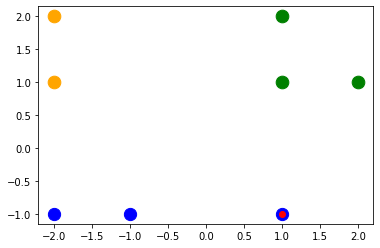

In [200]:
point = [1,-1]
predict_knn_class(point)
draw_graph(point)

euclidean distance|Feature1|Feature2|Class

 [2.8284271247461903, 1.0, 2.0, 3.0]

 [3.1622776601683795, 2.0, 1.0, 3.0]

 [3.605551275463989, 1.0, 1.0, 3.0]

 [5.385164807134504, -2.0, 2.0, 2.0]

 [5.385164807134504, 1.0, -1.0, 1.0]

 [5.830951894845301, -2.0, 1.0, 2.0]

 [6.4031242374328485, -1.0, -1.0, 1.0]

 [7.0710678118654755, -2.0, -1.0, 1.0]
Test data is in Class 3


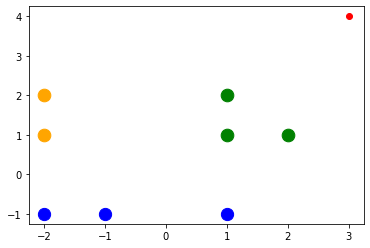

In [201]:
point = [3,4]
predict_knn_class(point)
draw_graph(point)

euclidean distance|Feature1|Feature2|Class

 [1.118033988749895, 1.0, 1.0, 3.0]

 [1.8027756377319946, -1.0, -1.0, 1.0]

 [1.8027756377319946, 1.0, -1.0, 1.0]

 [1.8027756377319946, 1.0, 2.0, 3.0]

 [2.0615528128088303, -2.0, 1.0, 2.0]

 [2.0615528128088303, 2.0, 1.0, 3.0]

 [2.5, -2.0, -1.0, 1.0]

 [2.5, -2.0, 2.0, 2.0]
Test data is in Class 1


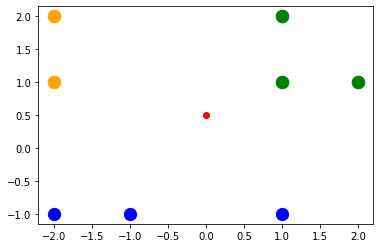

In [202]:
point = [0,.5]
predict_knn_class(point)
draw_graph(point)

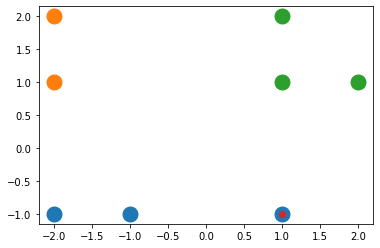

Feature1|Feature2|Class|diatance with test data
[[ 1.         -1.          1.          0.        ]
 [-1.         -1.          1.          2.        ]
 [ 1.          1.          3.          2.        ]
 [ 2.          1.          3.          2.23606798]
 [-2.         -1.          1.          3.        ]
 [ 1.          2.          3.          3.        ]
 [-2.          1.          2.          3.60555128]
 [-2.          2.          2.          4.24264069]]
test data = [ 1 -1]
class= 1.0


## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint: 

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid. 

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4. 

intial centroids = 
 [[-2.0, 0.0], [-0.6666666666666666, 0.0], [1.3333333333333333, 1.3333333333333333]]


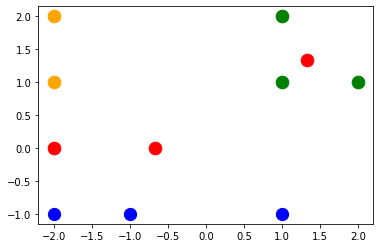

In [218]:
X = data[:,:-1]
m,n = X.shape

#calculate the mean
def mean_element_wise(x):
    length = len(x)
    sum1 = 0
    sum2 = 0
    vector = [0,0]
    for i in range(length):
        sum1 = sum1 + x[i][0]
        sum2 = sum2 + x[i][1]
    vector[0] = sum1/length
    vector[1] = sum2/length
    return vector        

def draw_graph(centroid):    
    class1_F1 = [1,-1,-2]
    class1_F2 = [-1,-1,-1]

    class2_F1 = [-2,-2]
    class2_F2 = [1,2]

    class3_F1 = [1,1,2]
    class3_F2 = [1,2,1]
    
    x1 = []
    y1 = []
    for i in range(3):
        x1.append(centroid[i][0])
        y1.append(centroid[i][1])

    
    plt.scatter(class1_F1,class1_F2,color='blue',s=150)
    plt.scatter(class2_F1,class2_F2,color='orange',s=160)
    plt.scatter(class3_F1,class3_F2,color='green',s=160)
    plt.scatter(x1,y1,color='red',s=160)
    
    
A1 = np.array([X[0],X[1]])
A2 = np.array([X[2],X[3],X[4]])
A3 = np.array([X[5],X[6],X[7]])

initial_centroid = [mean_element_wise(A1),mean_element_wise(A2),mean_element_wise(A3)]
print('intial centroids = \n',initial_centroid)


draw_graph(initial_centroid)

In [119]:
#write code for kmeans
#
import math
def calculate_distance(x,y):
    return math.sqrt(((x[1]-y[1])**2 + (x[0]-y[0])**2))

def find_Distance(y1,y2,y3):    
    distance_array = np.array([[calculate_distance(X[0],y1),calculate_distance(X[0],y2),calculate_distance(X[0],y3)],
                          [calculate_distance(X[1],y1),calculate_distance(X[1],y2),calculate_distance(X[1],y3)],
                          [calculate_distance(X[2],y1),calculate_distance(X[2],y2),calculate_distance(X[2],y3)],
                          [calculate_distance(X[3],y1),calculate_distance(X[3],y2),calculate_distance(X[3],y3)],
                          [calculate_distance(X[4],y1),calculate_distance(X[4],y2),calculate_distance(X[4],y3)],
                          [calculate_distance(X[5],y1),calculate_distance(X[5],y2),calculate_distance(X[5],y3)],
                          [calculate_distance(X[6],y1),calculate_distance(X[6],y2),calculate_distance(X[6],y3)],
                          [calculate_distance(X[7],y1),calculate_distance(X[7],y2),calculate_distance(X[7],y3)]])
    print(distance_array)
    
            
y1 = mean_element_wise(A1);
y2 = mean_element_wise(A2);
y3 = mean_element_wise(A3);

find_Distance(y1,y2,y3)




[[1.         1.66666667 4.06885187]
 [1.         1.66666667 3.34995854]
 [2.         2.40370085 3.39934634]
 [1.41421356 1.05409255 3.29983165]
 [3.16227766 1.94365063 2.3570226 ]
 [3.16227766 1.94365063 0.47140452]
 [3.60555128 2.60341656 0.74535599]
 [4.12310563 2.84800125 0.74535599]]


In [120]:
A21 = []
A22 = []
A23 = []
def suffle_class(d_array):
    for i in range(len(d_array)):
        if d_array[i,0]<=d_array[i,1] and d_array[i,0]<=d_array[i,2]:
            print("X",i," is in C1 ")
            A21.append(X[i])
        elif d_array[i,1]<=d_array[i,2]:
            print("X",i," is in C2")
            A22.append(X[i])
        else:
            print("X",i," is in C3")
            A23.append(X[i])

suffle_class(distance_array)

X 0  is in C1 
X 1  is in C1 
X 2  is in C1 
X 3  is in C2
X 4  is in C2
X 5  is in C3
X 6  is in C3
X 7  is in C3


[[-2.0, 0.6666666666666666], [0.0, -1.0], [1.3333333333333333, 1.3333333333333333]]


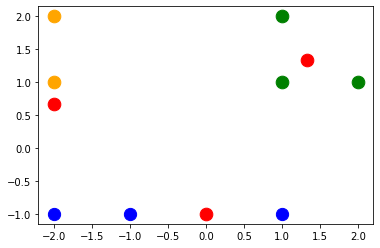

In [219]:
second_centroid = [mean_element_wise(A21),mean_element_wise(A22),mean_element_wise(A23)]
print(second_centroid)
draw_graph(second_centroid)

In [122]:
y1 = mean_element_wise(A21);
y2 = mean_element_wise(A22);
y3 = mean_element_wise(A23);
find_Distance(y1,y2,y3)


[[1.66666667 2.         4.06885187]
 [0.33333333 2.82842712 3.34995854]
 [1.33333333 3.60555128 3.39934634]
 [1.94365063 1.         3.29983165]
 [3.43187671 1.         2.3570226 ]
 [3.01846171 2.23606798 0.47140452]
 [3.2829526  3.16227766 0.74535599]
 [4.01386486 2.82842712 0.74535599]]


In [123]:
suffle_class(distance_array)

X 0  is in C1 
X 1  is in C1 
X 2  is in C1 
X 3  is in C2
X 4  is in C2
X 5  is in C3
X 6  is in C3
X 7  is in C3


we will not iterating again becuase in previous and this iteration we are getting the same clusters. more over centroid will be same for both the case.